# TASK 7

**IMPORTING LIBRARIES:**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk
import warnings
%matplotlib inline

warnings.filterwarnings('ignore')

**IMPORTING THE DATASET:**

In [2]:
#loading the dataset to pandas Dataframe
train_dataset = pd.read_csv('train.csv')
test_dataset = pd.read_csv('test.csv')

In [3]:
#To visualize first five rows of dataset
train_dataset.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [4]:
#To visualize first five rows of dataset
test_dataset.head()

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."


In [5]:
#To visualize bottom five rows in dataset
train_dataset.tail()

,id,label,tweet
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,..."
31961,31962,0,thank you @user for you follow


In [6]:
#To visualize bottom five rows in dataset
test_dataset.tail()

,id,tweet
17192,49155,thought factory: left-right polarisation! #tru...
17193,49156,feeling like a mermaid ð #hairflip #neverre...
17194,49157,#hillary #campaigned today in #ohio((omg)) &am...
17195,49158,"happy, at work conference: right mindset leads..."
17196,49159,"my song ""so glad"" free download! #shoegaze ..."


In [7]:
#total number of rows and columns in dataset
#there are 31962 rows and 3 columns in train dataset
#there are 17197 rows and 2 columns in test dataset
print(train_dataset.shape)
print(test_dataset.shape)

(31962, 3)
(17197, 2)


In [8]:
#getting the stastics of dataset
train_dataset.describe
test_dataset.describe

<bound method NDFrame.describe of           id                                              tweet
0      31963  #studiolife #aislife #requires #passion #dedic...
1      31964   @user #white #supremacists want everyone to s...
2      31965  safe ways to heal your #acne!!    #altwaystohe...
3      31966  is the hp and the cursed child book up for res...
4      31967    3rd #bihday to my amazing, hilarious #nephew...
...      ...                                                ...
17192  49155  thought factory: left-right polarisation! #tru...
17193  49156  feeling like a mermaid ð #hairflip #neverre...
17194  49157  #hillary #campaigned today in #ohio((omg)) &am...
17195  49158  happy, at work conference: right mindset leads...
17196  49159  my   song "so glad" free download!  #shoegaze ...

[17197 rows x 2 columns]>

In [9]:
#get whole information about dataset
train_dataset.info()
test_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17197 entries, 0 to 17196
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      17197 non-null  int64 
 1   tweet   17197 non-null  object
dtypes: int64(1), object(1)
memory usage: 268.8+ KB


In [10]:
#let's see what data types how many features we are having
train_dataset.dtypes.value_counts
test_dataset.dtypes.value_counts()

int64     1
object    1
dtype: int64

In [11]:
#total missing vaues in dataset
train_dataset.isnull().values.any()
test_dataset.isnull().values.any()

False

In [12]:
# displaying number of records in dataset
len(train_dataset)
len(test_dataset)

17197

In [13]:
# checking for null values in dataset
train_dataset.isna().any()
test_dataset.isna().any()

id       False
tweet    False
dtype: bool

In [14]:
# checking out the negative comments from the train set
train_dataset[train_dataset['label'] == 0].head(10)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before the...
6,7,0,@user camping tomorrow @user @user @user @use...
7,8,0,the next school year is the year for exams.ð...
8,9,0,we won!!! love the land!!! #allin #cavs #champ...
9,10,0,@user @user welcome here ! i'm it's so #gr...


In [15]:
# checking out the postive comments from the train set 
train_dataset[train_dataset['label'] == 1].head(10)

,id,label,tweet
13,14,1,@user #cnn calls #michigan middle school 'buil...
14,15,1,no comment! in #australia #opkillingbay #se...
17,18,1,retweet if you agree!
23,24,1,@user @user lumpy says i am a . prove it lumpy.
34,35,1,it's unbelievable that in the 21st century we'...
56,57,1,@user lets fight against #love #peace
68,69,1,ð©the white establishment can't have blk fol...
77,78,1,"@user hey, white people: you can call people '..."
82,83,1,how the #altright uses &amp; insecurity to lu...
111,112,1,@user i'm not interested in a #linguistics tha...


**CORRELATION:**

In [16]:
#getting correlation
train_dataset.corr()
test_dataset.corr()

,id
id,1.0


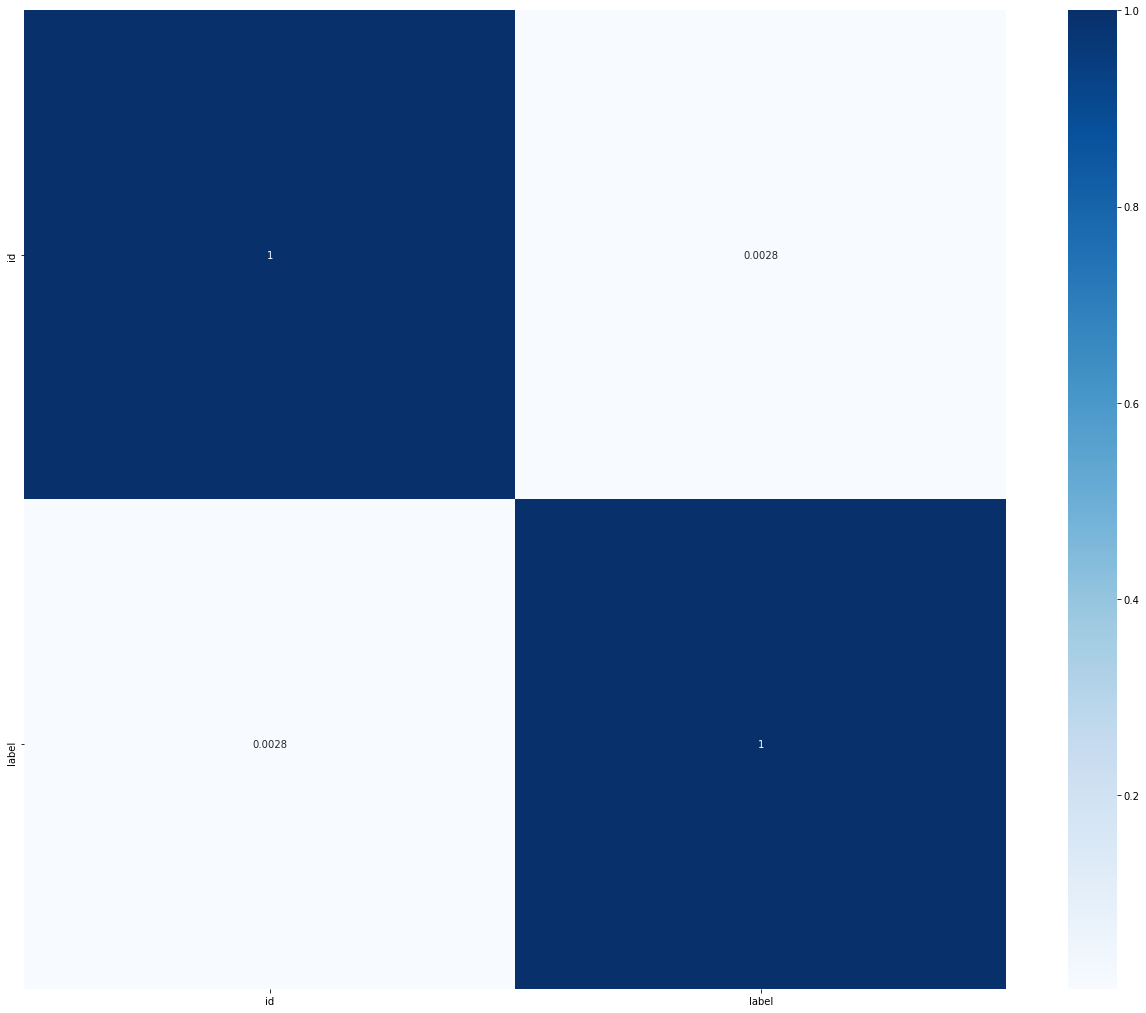

In [17]:
corrmat = train_dataset.corr()
top_corr = corrmat.index
plt.figure(figsize =(22,18))
p = sns.heatmap(train_dataset[top_corr].corr(),annot = True,cmap ="Blues")
plt.show()

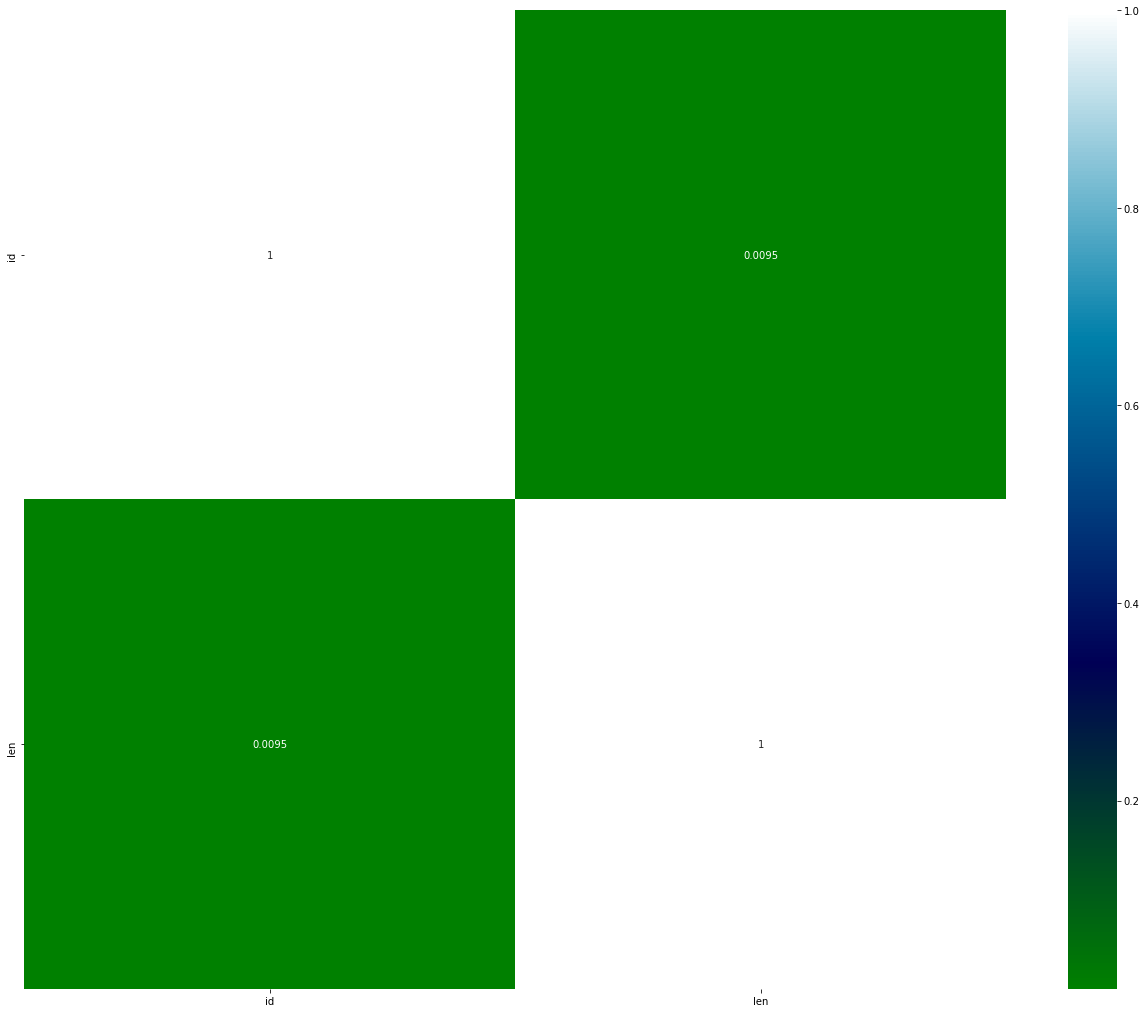

In [102]:
corrmat = test_dataset.corr()
top_corr = corrmat.index
plt.figure(figsize =(22,18))
p = sns.heatmap(test_dataset[top_corr].corr(),annot = True,cmap ="ocean")
plt.show()

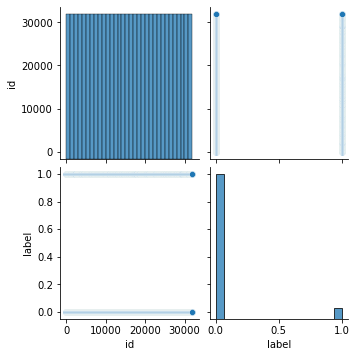

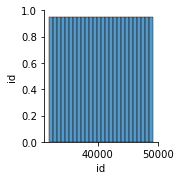

In [19]:
sns.pairplot(train_dataset)
sns.pairplot(test_dataset)

**VIZUALIZATION OF DATA:**

<AxesSubplot:>

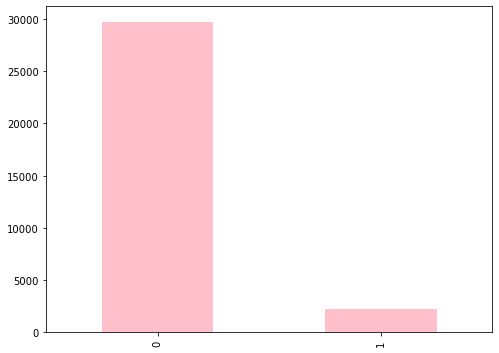

In [20]:
train_dataset['label'].value_counts().plot.bar(color = 'pink', figsize = (8, 6))

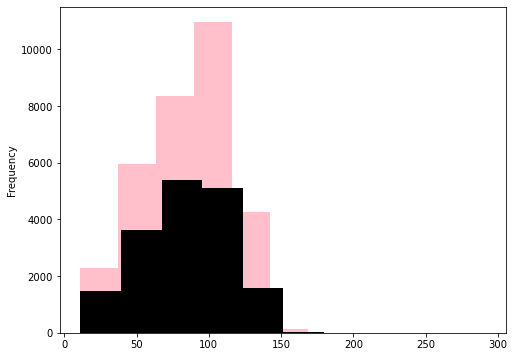

In [21]:
# checking the distribution of tweets in the data
length_train = train_dataset['tweet'].str.len().plot.hist(color = 'pink', figsize = (8, 6))
length_test = test_dataset['tweet'].str.len().plot.hist(color = 'black', figsize = (8, 6))

In [22]:
# adding a column to represent the length of the tweet
train_dataset['len'] = train_dataset['tweet'].str.len()
test_dataset['len'] = test_dataset['tweet'].str.len()

train_dataset.head(10)

,id,label,tweet,len
0,1,0,@user when a father is dysfunctional and is s...,102
1,2,0,@user @user thanks for #lyft credit i can't us...,122
2,3,0,bihday your majesty,21
3,4,0,#model i love u take with u all the time in ...,86
4,5,0,factsguide: society now #motivation,39
5,6,0,[2/2] huge fan fare and big talking before the...,116
6,7,0,@user camping tomorrow @user @user @user @use...,74
7,8,0,the next school year is the year for exams.ð...,143
8,9,0,we won!!! love the land!!! #allin #cavs #champ...,87
9,10,0,@user @user welcome here ! i'm it's so #gr...,50


In [23]:
train_dataset.groupby('label').describe()

id                                                               \
         count          mean          std   min      25%      50%       75%   
label                                                                         
0      29720.0  15974.454441  9223.783469   1.0  7981.75  15971.5  23965.25   
1       2242.0  16074.896075  9267.955758  14.0  8075.25  16095.0  24022.00   

                    len                                                        
           max    count       mean        std   min   25%   50%    75%    max  
label                                                                          
0      31962.0  29720.0  84.328634  29.566484  11.0  62.0  88.0  107.0  274.0  
1      31961.0   2242.0  90.187779  27.375502  12.0  69.0  96.0  111.0  152.0

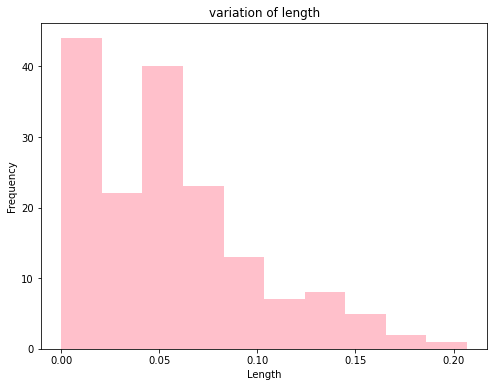

In [24]:
train_dataset.groupby('len').mean()['label'].plot.hist(color = 'pink', figsize = (8, 6),)
plt.title('variation of length')
plt.xlabel('Length')
plt.show()

In [25]:
# collecting the hashtags

def hashtag_extract(x):
    hashtags = []
    
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

In [26]:
# extracting hashtags from non racist/bad tweets
HT_regular = hashtag_extract(train_dataset['tweet'][train_dataset['label'] == 0])

# extracting hashtags from racist/bad tweets
HT_negative = hashtag_extract(train_dataset['tweet'][train_dataset['label'] == 1])

# unnesting list
HT_regular = sum(HT_regular,[])
HT_negative = sum(HT_negative,[])

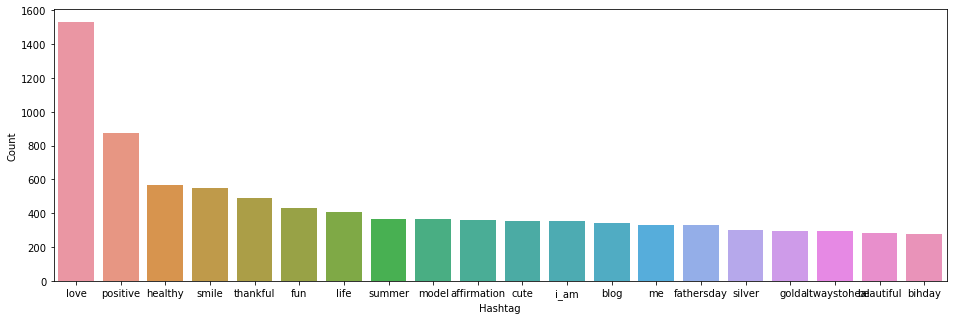

In [27]:

a = nltk.FreqDist(HT_regular)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

# selecting top 20 most frequent hashtags     
d = d.nlargest(columns="Count", n = 20) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

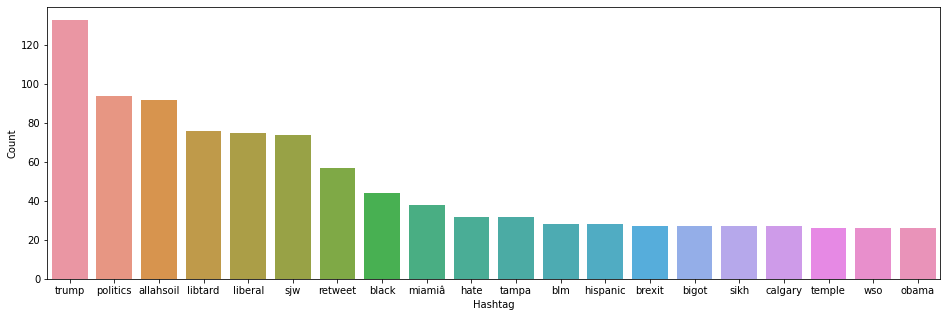

In [28]:
a = nltk.FreqDist(HT_negative)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

# selecting top 20 most frequent hashtags     
d = d.nlargest(columns="Count", n = 20) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

In [29]:
pip install freetype-py

Text(0.5, 1.0, 'Most Frequently Occuring Words - Top 30')

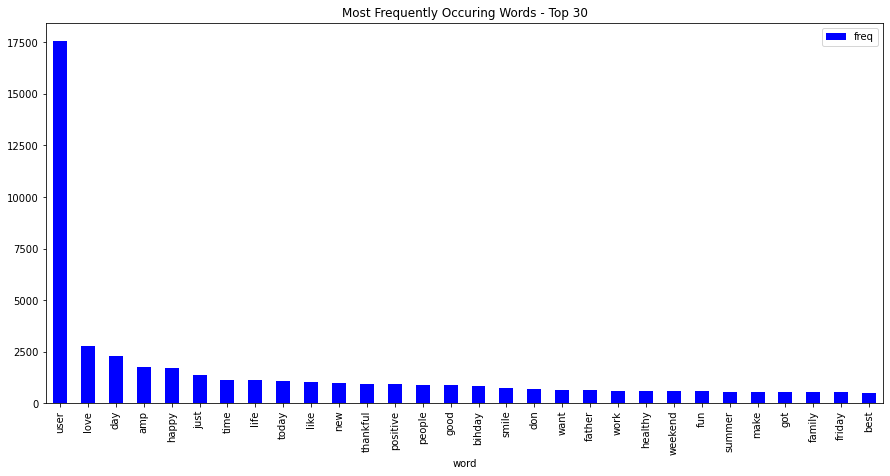

In [30]:
from sklearn.feature_extraction.text import CountVectorizer


cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(train_dataset.tweet)

sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

frequency.head(30).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = 'blue')
plt.title("Most Frequently Occuring Words - Top 30")

In [31]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


Text(0.5, 1.0, 'WordCloud - Vocabulary from Reviews')

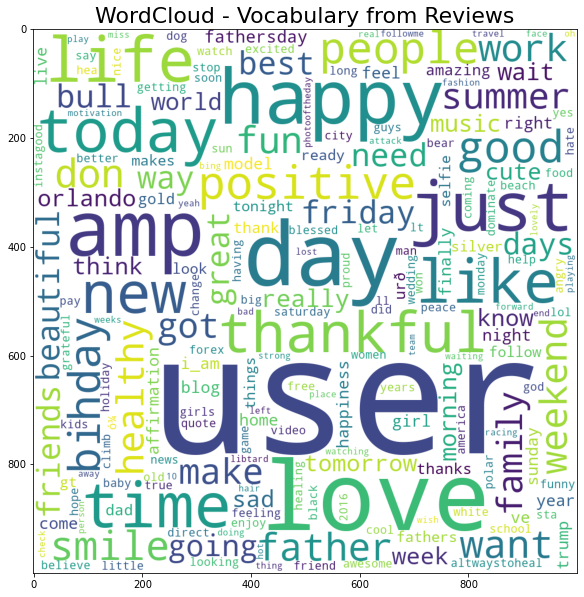

In [32]:
from wordcloud import WordCloud

wordcloud = WordCloud(background_color = 'white', width = 1000, height = 1000).generate_from_frequencies(dict(words_freq))

plt.figure(figsize=(15,10))
plt.imshow(wordcloud)
plt.title("WordCloud - Vocabulary from Reviews", fontsize = 22)

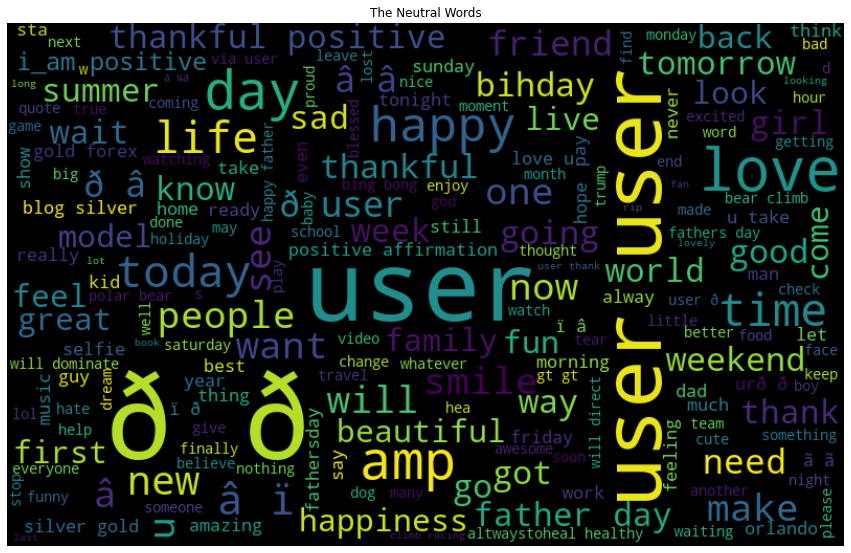

In [33]:
normal_words =' '.join([text for text in train_dataset['tweet'][train_dataset['label'] == 0]])

wordcloud = WordCloud(width=800, height=500, random_state = 0, max_font_size = 110).generate(normal_words)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Neutral Words')
plt.show()

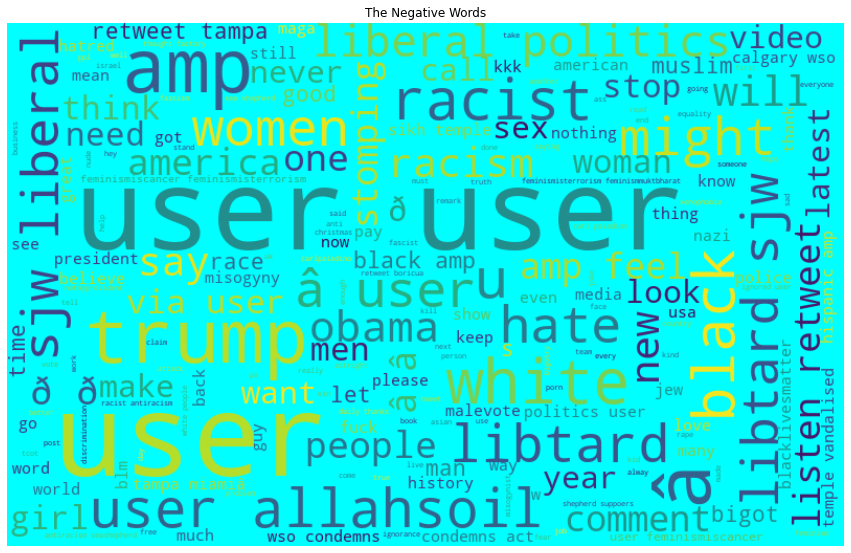

In [34]:
negative_words =' '.join([text for text in train_dataset['tweet'][train_dataset['label'] == 1]])

wordcloud = WordCloud(background_color = 'cyan', width=800, height=500, random_state = 0, max_font_size = 110).generate(negative_words)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Negative Words')
plt.show()

**DATA SPLITTING:**

In [35]:
# removing unwanted patterns from the data

import re
import nltk

nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\VH\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [36]:
train_corpus = []

for i in range(0, 31962):
  review = re.sub('[^a-zA-Z]', ' ', train_dataset['tweet'][i])
  review = review.lower()
  review = review.split()
  
  ps = PorterStemmer()
  
  # stemming
  review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
  
  # joining them back with space
  review = ' '.join(review)
  train_corpus.append(review)

In [37]:
test_corpus = []

for i in range(0, 17197):
  review = re.sub('[^a-zA-Z]', ' ', test_dataset['tweet'][i])
  review = review.lower()
  review = review.split()
  
  ps = PorterStemmer()
  
  # stemming
  review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
  
  # joining them back with space
  review = ' '.join(review)
  test_corpus.append(review)

In [38]:
# creating bag of words

from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features = 2500)
x = cv.fit_transform(train_corpus).toarray()
y = train_dataset.iloc[:, 1]

print(x.shape)
print(y.shape)

(31962, 2500)
(31962,)


In [39]:
# creating bag of words

from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features = 2500)
x_test = cv.fit_transform(test_corpus).toarray()

print(x_test.shape)

(17197, 2500)


In [40]:
# splitting the training data into train and valid sets

from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size = 0.25, random_state = 42)

print(x_train.shape)
print(x_valid.shape)
print(y_train.shape)
print(y_valid.shape)

(23971, 2500)
(7991, 2500)
(23971,)
(7991,)


**LOGISTIC REGRESSION CLASSIFIER:**

In [41]:
from sklearn.linear_model import LogisticRegression

In [42]:
logReg = LogisticRegression()

In [43]:
logReg.fit(x_train, y_train)

LogisticRegression()

In [44]:
logReg.score(x_valid , y_valid)

0.9535727693655363

In [45]:
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score

In [46]:
predictions = logReg.predict(x_valid)

In [47]:
cm = confusion_matrix(y_valid,predictions)

In [48]:
cm

array([[7353,   79],
       [ 292,  267]], dtype=int64)

<AxesSubplot:>

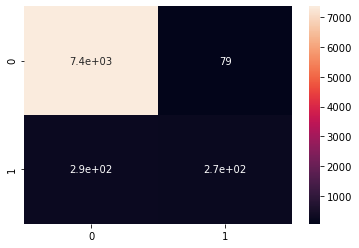

In [49]:
sns.heatmap(cm , annot=True)

In [50]:
print(f'classification report is: {classification_report(y_valid, predictions)}')
print(f'confusion matrix is:{confusion_matrix(y_valid, predictions)}')
print(f'accuracy score is:{accuracy_score(y_valid, predictions)}')

classification report is:               precision    recall  f1-score   support

           0       0.96      0.99      0.98      7432
           1       0.77      0.48      0.59       559

    accuracy                           0.95      7991
   macro avg       0.87      0.73      0.78      7991
weighted avg       0.95      0.95      0.95      7991

confusion matrix is:[[7353   79]
 [ 292  267]]
accuracy score is:0.9535727693655363


**RANDOM FOREST CLASSIFIER:**

In [51]:
from sklearn.ensemble import RandomForestClassifier

In [52]:
random_forest_model = RandomForestClassifier(random_state = 10)

In [53]:
random_forest_model.fit(x_train,y_train.ravel())

RandomForestClassifier(random_state=10)

In [54]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [55]:
predictions = random_forest_model.predict(x_valid)

In [57]:
cm = confusion_matrix(y_valid,predictions)

In [58]:
cm

array([[7310,  122],
       [ 258,  301]], dtype=int64)

<AxesSubplot:>

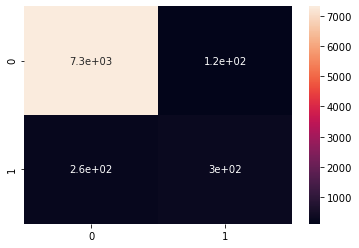

In [59]:
sns.heatmap(cm, annot = True)

In [60]:
print(f'classification report is: {classification_report(y_valid, predictions)}')
print(f'confusion matrix is:{confusion_matrix(y_valid, predictions)}')
print(f'accuracy score is:{accuracy_score(y_valid, predictions)}')

classification report is:               precision    recall  f1-score   support

           0       0.97      0.98      0.97      7432
           1       0.71      0.54      0.61       559

    accuracy                           0.95      7991
   macro avg       0.84      0.76      0.79      7991
weighted avg       0.95      0.95      0.95      7991

confusion matrix is:[[7310  122]
 [ 258  301]]
accuracy score is:0.9524465023151045


**SUPPORT VECTOR CLASSIFIER:**

In [61]:
from sklearn.svm import SVC

In [62]:
supportvectorclassifier = SVC()

In [63]:
supportvectorclassifier.fit(x_train, y_train)

SVC()

In [64]:
supportvectorclassifier.score(x_valid , y_valid)

0.9538230509322988

In [65]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [66]:
predictions = supportvectorclassifier.predict(x_valid)

In [68]:
cm = confusion_matrix(y_valid,predictions)

In [69]:
cm

array([[7415,   17],
       [ 352,  207]], dtype=int64)

<AxesSubplot:>

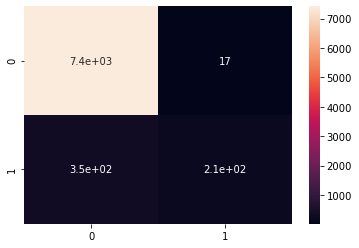

In [70]:
sns.heatmap(cm , annot=True)

In [72]:
print(f'classification report is: {classification_report(y_valid, predictions)}')
print(f'confusion matrix is:{confusion_matrix(y_valid, predictions)}')
print(f'accuracy score is:{accuracy_score(y_valid, predictions)}')

classification report is:               precision    recall  f1-score   support

           0       0.95      1.00      0.98      7432
           1       0.92      0.37      0.53       559

    accuracy                           0.95      7991
   macro avg       0.94      0.68      0.75      7991
weighted avg       0.95      0.95      0.94      7991

confusion matrix is:[[7415   17]
 [ 352  207]]
accuracy score is:0.9538230509322988


**DECISION TREE CLASSIFIER:**

In [73]:
from sklearn.tree import DecisionTreeClassifier

In [74]:
dtc = DecisionTreeClassifier()

In [75]:
dtc.fit(x_train, y_train)

DecisionTreeClassifier()

In [77]:
dtc.score(x_valid, y_valid)

0.9317982730571893

In [78]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [82]:
predictions = dtc.predict(x_valid)

In [83]:
cm = confusion_matrix(y_valid,predictions)

In [84]:
cm

array([[7131,  301],
       [ 244,  315]], dtype=int64)

<AxesSubplot:>

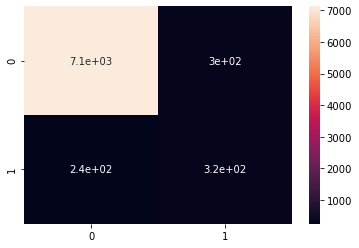

In [85]:
sns.heatmap(cm , annot=True)

In [86]:
print(f'classification report is: {classification_report(y_valid, predictions)}')
print(f'confusion matrix is:{confusion_matrix(y_valid, predictions)}')
print(f'accuracy score is:{accuracy_score(y_valid, predictions)}')

classification report is:               precision    recall  f1-score   support

           0       0.97      0.96      0.96      7432
           1       0.51      0.56      0.54       559

    accuracy                           0.93      7991
   macro avg       0.74      0.76      0.75      7991
weighted avg       0.94      0.93      0.93      7991

confusion matrix is:[[7131  301]
 [ 244  315]]
accuracy score is:0.9317982730571893


**NAIVE BAYES:**

In [87]:
from sklearn.naive_bayes import GaussianNB

In [88]:
clf = GaussianNB()

In [89]:
clf.fit(x_train,y_train)

GaussianNB()

In [91]:
clf.score(x_valid, y_valid)

0.6637467150544363

In [92]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [96]:
predictions = clf.predict(x_valid)

In [97]:
cm = confusion_matrix(y_valid,predictions)

In [98]:
cm

array([[4849, 2583],
       [ 104,  455]], dtype=int64)

<AxesSubplot:>

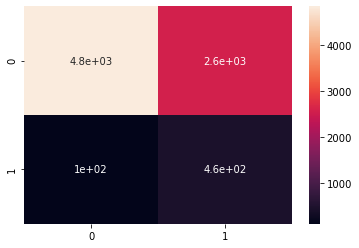

In [99]:
sns.heatmap(cm, annot = True)

In [101]:
print(f'classification report is: {classification_report(y_valid, predictions)}')
print(f'confusion matrix is:{confusion_matrix(y_valid, predictions)}')
print(f'accuracy score is:{accuracy_score(y_valid, predictions)}')

classification report is:               precision    recall  f1-score   support

           0       0.98      0.65      0.78      7432
           1       0.15      0.81      0.25       559

    accuracy                           0.66      7991
   macro avg       0.56      0.73      0.52      7991
weighted avg       0.92      0.66      0.75      7991

confusion matrix is:[[4849 2583]
 [ 104  455]]
accuracy score is:0.6637467150544363
